In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)


# Data Load

In [21]:
train = pd.read_csv("./dataset/train.csv", parse_dates=['datetime'])
test  = pd.read_csv("./dataset/test.csv" , parse_dates=['datetime'])
submit = pd.read_csv("./dataset/sampleSubmission.csv")

In [22]:
print(train.shape)
print(train.info())
train.head(2)

(10886, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [23]:
print(test.shape)
print(test.info())
test.head(2)

(6493, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB
None


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


## train에만 있는 피쳐 삭제
* test는 타겟피쳐가 없기 때문에 train - 1개 피쳐를 갖는다

## train_test 합치기

In [24]:
train = train.drop(['casual', 'registered'], axis=1)
train.shape, test.shape

((10886, 10), (6493, 9))

In [25]:
train_test = pd.concat([train, test], axis=0)
train_test.shape

(17379, 10)

In [26]:
train_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0


## train_test 분리

In [ ]:
# train = train_test.iloc[:10886]
# test = train_test.iloc[10886:]
# test = test.drop(['count'], axis=1)
# train.shape, test.shape


In [ ]:
# for df in  [train, test]:
#     df = df.rename(columns={"datetime":"regtime"})
    
#     df['PC_y'] = df['regtime'].dt.year
#     df['PC_m'] = df['regtime'].dt.month
#     df['PC_d'] = df['regtime'].dt.day
#     df['PC_h'] = df['regtime'].dt.hour
#     df['PC_w'] = df['regtime'].dt.dayofweek  #0:월~6:일

In [28]:
train_test = train_test.rename(columns={"datetime":"regtime"})

In [29]:
train_test.head()

,regtime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0


In [30]:
train_test['PC_y'] = train_test['regtime'].dt.year
train_test['PC_m'] = train_test['regtime'].dt.month
train_test['PC_d'] = train_test['regtime'].dt.day
train_test['PC_h'] = train_test['regtime'].dt.hour
train_test['PC_w'] = train_test['regtime'].dt.dayofweek  #0:월~6:일
train_test.tail(2)  #2011-01-01 00:00:00  --> 2011	1	1	0	5(토)
              #2012-12-19 23:00:00  --> 2012	12	19	22	2(수)

,regtime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,PC_y,PC_m,PC_d,PC_h,PC_w
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,2012,12,31,22,0
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981,NaN,2012,12,31,23,0


* 피쳐 --> index로 집어넣기

In [31]:
train_test = train_test.set_index('regtime')
train_test.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,PC_y,PC_m,PC_d,PC_h,PC_w
regtime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,2011,1,1,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,2011,1,1,1,5


* index --> 피쳐로 꺼내기

In [ ]:
# train_test = train_test.reset_index() #inplace=False,
# train_test.head()

# 우선 점수보기
* 결측없다
* object 없다

In [32]:
train = train_test.iloc[:10886]
test = train_test.iloc[10886:]
test = test.drop(['count'], axis=1)

#----------------------------------------------- 하단 코드 동일
y = train['count']
X = train.drop(['count'], axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
model = RandomForestRegressor(random_state=0, n_estimators=100)

model.fit(X_train, y_train)
pred = model.predict(X_val)
rmse = mean_squared_error(y_val, pred, squared=False)
print(f"RMSLE:{rmse:.4f} {model.__class__.__name__}")  # np.squrt(mean_squared_log_error())


RMSLE:38.2739 RandomForestRegressor


# submit 제출 방법

In [40]:
#------------------------------------------------- 공모전 제출용 학습
test_pred = model.predict(test)        #---------->  submit 제출 답안
test_pred = np.round(test_pred, 0).astype(int)

#------------------------------------------------- 제출 전 확인
print(len(test_pred), test_pred)
print(submit['datetime'].min(), submit['datetime'].max())
print(test.index.values.min()   , test.index.values.max())
submit.head(1)
#------------------------------------------------- 답안지 작성
submit['count'] = test_pred.reshape(-1,1)
print(submit.head(2))
submit.to_csv("v01.csv", index=False)             # top33% 0.421??

6493 [ 13   6   6 ... 147 109  66]


#top33% 0.421??

# EDA
* ref : https://seaborn.pydata.org/generated/seaborn.countplot.html
* ref : https://seaborn.pydata.org/generated/seaborn.barplot.html
* linechart : PC~관련피쳐
* barchart
* boxplot

## train test 분포도

In [56]:
print(train.columns.tolist())

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count', 'PC_y', 'PC_m', 'PC_d', 'PC_h', 'PC_w']


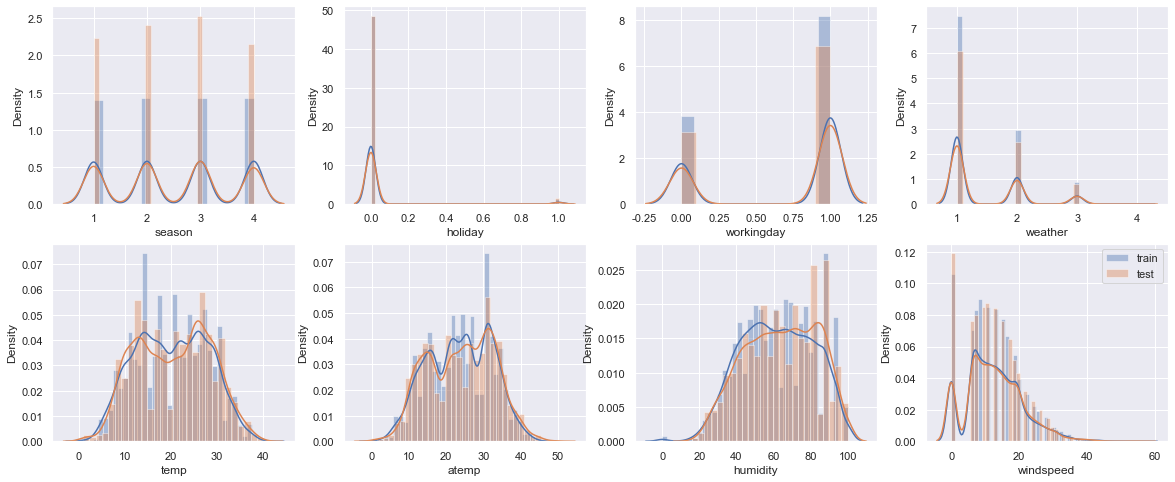

In [58]:
p, axes = plt.subplots(2,4, figsize=(20,8))
col_list = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
for i, col in enumerate(col_list):
    r = i//4
    c = i%4
    sns.distplot(train[col], label="train", ax=axes[r][c])
    sns.distplot(test[col], label="test",  ax=axes[r][c])
plt.legend()
plt.show()

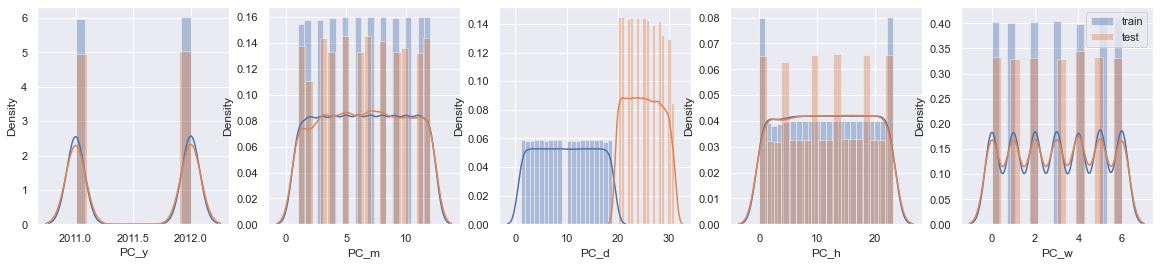

In [62]:
p, axes = plt.subplots(1,5, figsize=(20,4))
col_list = ['PC_y', 'PC_m', 'PC_d', 'PC_h', 'PC_w']
for i, col in enumerate(col_list):
    sns.distplot(train[col], label="train", ax=axes[i])
    sns.distplot(test[col], label="test",  ax=axes[i])
plt.legend()
plt.show()

<AxesSubplot:xlabel='PC_d', ylabel='count'>

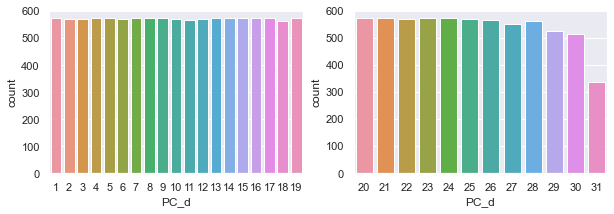

In [66]:
p, axes = plt.subplots(1,2, figsize=(10,3))
sns.countplot(train["PC_d"], ax=axes[0])
sns.countplot(test["PC_d"], ax=axes[1])

In [73]:
print(test.shape,   test[test["PC_d"]>=29]["PC_d"].shape[0] , test[test["PC_d"]>=29]["PC_d"].shape[0]/test.shape[0])
test[test["PC_d"]>=29]["PC_d"].value_counts()

(6493, 13) 1376 0.2119205298013245


29    526
30    514
31    336
Name: PC_d, dtype: int64

* PC_d : train(1 ~ 20) , test(20 ~ 31)
* 학습에서 제외

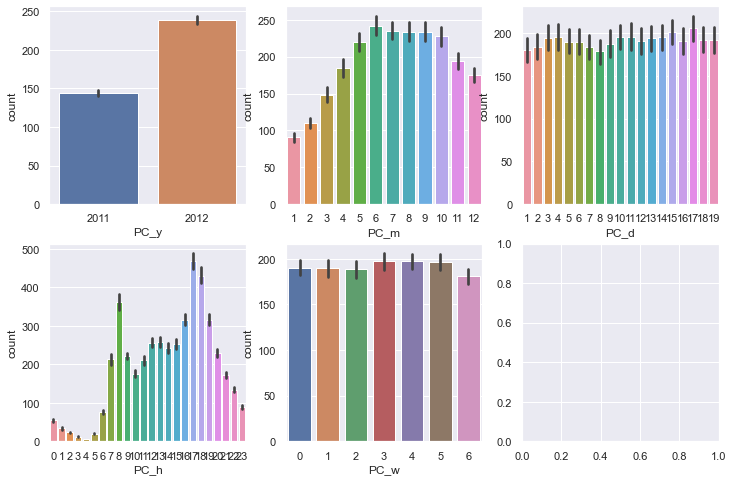

In [63]:
p, axes = plt.subplots(2,3, figsize=(12,8))
sns.barplot(train["PC_y"], train["count"], ax=axes[0][0])
sns.barplot(train["PC_m"], train["count"], ax=axes[0][1])
sns.barplot(train["PC_d"], train["count"], ax=axes[0][2])
sns.barplot(train["PC_h"], train["count"], ax=axes[1][0])
sns.barplot(train["PC_w"], train["count"], ax=axes[1][1])
plt.show()

* 주말 ~ 평일 : 차이 무의미하다
* 날씨 : 5월 ~ 10월
* 시간 : 7 ~ 9시 , 17 ~ 18시  --> 출퇴근,통학용 주로 이용될 듯 하다.

<pre>  
평일/휴일
    'holiday', 'workingday' 

계절
    'season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed'

In [48]:
train[['holiday', 'workingday', 'PC_w']].value_counts()

holiday  workingday  PC_w
0        0           5       1584
                     6       1579
         1           3       1553
                     1       1539
                     2       1527
                     4       1481
                     0       1312
1        0           0        239
                     4         48
                     2         24
dtype: int64

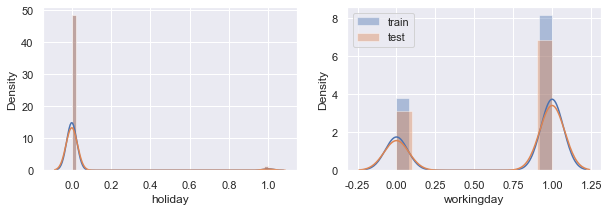

In [76]:
p, axes = plt.subplots(1,2, figsize=(10,3))
col_list = ['holiday', 'workingday']
for i, col in enumerate(col_list):
    sns.distplot(train[col], label="train", ax=axes[i])
    sns.distplot(test[col], label="test",  ax=axes[i])
plt.legend()
plt.show()

* season ,  PC_m : 다중공선 확인 필요

In [49]:
train[['season', 'PC_m']].value_counts().sort_index()

season  PC_m
1       1       884
        2       901
        3       901
2       4       909
        5       912
        6       912
3       7       912
        8       912
        9       909
4       10      911
        11      911
        12      912
dtype: int64

*  'weather', 'temp', 'atemp', 'humidity', 'windspeed'

In [50]:
train[['weather', 'temp', 'atemp', 'humidity', 'windspeed']].head()

,weather,temp,atemp,humidity,windspeed
regtime,,,,,
2011-01-01 00:00:00,1,9.84,14.395,81,0.0
2011-01-01 01:00:00,1,9.02,13.635,80,0.0
2011-01-01 02:00:00,1,9.02,13.635,80,0.0
2011-01-01 03:00:00,1,9.84,14.395,75,0.0
2011-01-01 04:00:00,1,9.84,14.395,75,0.0


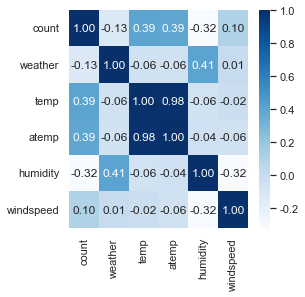

In [51]:
plt.figure(figsize=(4,4))
sns.heatmap(train[['count','weather', 'temp', 'atemp', 'humidity', 'windspeed']].corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

<pre>
* temp    - atemp     : 다중공선                 --> 피쳐 drop
* weather - count     : -0.13 별 관계가 없다      --> weather 4 아웃라이어 처리 안함
* weather - windspeed :  0.10 아무 관계도 아니다  --> 0 데이터 처리 

* weather - humidity  :  0.41 약한 상관관계

In [52]:
train['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

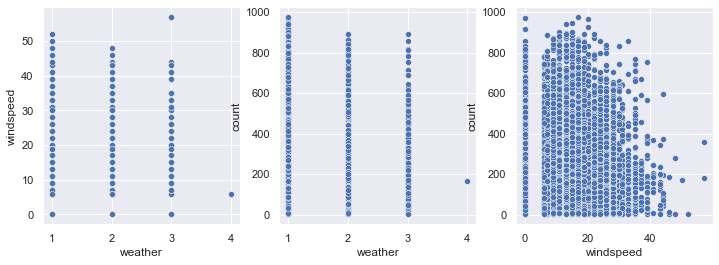

In [53]:
p, axes = plt.subplots(1,3, figsize=(12,4))
sns.scatterplot(x=train['weather'], y=train['windspeed'], ax=axes[0])
sns.scatterplot(x=train['weather'], y=train['count'], ax=axes[1])
sns.scatterplot(x=train['windspeed'], y=train['count'], ax=axes[2])
plt.show()

### 불필요 컬럼 삭제

In [79]:
train_test = train_test.drop(['temp','PC_d'], axis=1)

In [80]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   holiday     17379 non-null  int64  
 2   workingday  17379 non-null  int64  
 3   weather     17379 non-null  int64  
 4   atemp       17379 non-null  float64
 5   humidity    17379 non-null  int64  
 6   windspeed   17379 non-null  float64
 7   count       10886 non-null  float64
 8   PC_y        17379 non-null  int64  
 9   PC_m        17379 non-null  int64  
 10  PC_h        17379 non-null  int64  
 11  PC_w        17379 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.7 MB


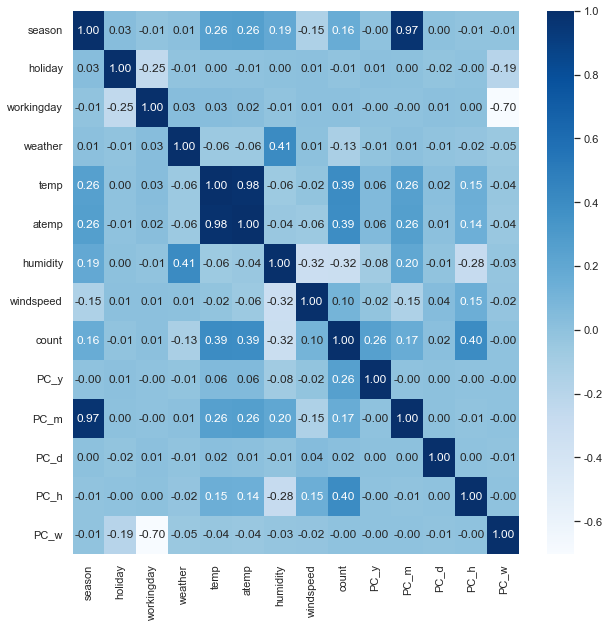

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

### 삭제 피쳐

* season  - PC_m : 다중공선 --> 학습 후 결정


# 본격적 가공

## windspeed
* weather - count     : -0.13 별 관계가 없다
* weather - windspeed :  0.10 아무 관계도 아니다

In [ ]:
train['windspeed'].value_counts()

In [ ]:
train[train['windspeed'] == .0].shape, train[train['windspeed'] == .0].shape[0]/train.shape[0]

In [ ]:
#  train[~train['windspeed'] == .0].shape
train[train['windspeed'] != .0].shape,     train[train['windspeed'] != .0].shape[0]/train.shape[0]

In [ ]:
train[train['windspeed'] != .0]

In [ ]:
# KNN, RFR ... 

col_list = ['season', 'weather', 'atemp', 'humidity', 'PC_y', 'PC_m', 'PC_d', 'PC_h']

windspped_X_train = train[train['windspeed'] != .0][col_list]        #--9573 .. ~windspped
windspped_y_train = train[train['windspeed'] != .0]['windspeed']     #--9573 ..  windspped
windspped_X_test  = train[train['windspeed'] == .0][col_list] 
# windspped_y_test  = pred
print(windspped_y_train.shape, windspped_X_train.shape)
windspped_X_train.head()

windspped_model = RandomForestRegressor(n_estimators=100, random_state=1234)
windspped_model.fit(windspped_X_train, windspped_y_train)
windspped_pred = windspped_model.predict(windspped_X_test)           #--1313문제
print(windspped_pred[:5],  windspped_pred.shape)                     #--1313 예측답안갯수

#--1313건에 해당하는 0값을 windspped값을 pred    -->   windspped_y_test로 대체
#windspped_y_test['windspped']  = pred.reshape(-1,1)

# train[train['col']>0] = 5                    #error
train.loc[train['windspeed'] == .0 , 'windspeed'] = windspped_pred.reshape(-1,1)

In [ ]:
sns.scatterplot(x=train['windspeed'], y=train['count'])
plt.show()

## 파생변수

## 스케일링
* 정규화
* 왜도/첨도

## 아웃라이어

# 모델 학습  & 평가 & 검증

* train 8 : val 2  
* model.fit()  model_predict(val 2 ) --> score(y_val, pred_val2) 
* model확정 :  test_pred = model_predict(test)  -->  score(공모전답안지, test_pred ) 
* test_pred --> 내가 test문제를 (model확정) 풀어서 test_pred 답안을 submit.csv에 적어서 이 파일을 제출


In [ ]:
y = train['count']
X = train.drop(['count'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
model = RandomForestRegressor(random_state=0, n_estimators=100)

model.fit(X_train, y_train)
pred = model.predict(X_test)
rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE:{rmse:.4f} {model.__class__.__name__}")